Clustering - Uber
1. Prepración de datos: variables numéricas se deben normalizar y variables categóricas se crean dummies
2. Aprendizaje del modelo: Kmeans, método del codo/rodilla
3. Evaluación del modelo: Inertia, silueta
4. Perfilamiento: Descripción de centroides.

In [6]:
import pandas as pd
import numpy as np #matrices y vectores
import matplotlib.pyplot as plt #grafica

In [25]:
data = pd.read_excel("/content/Base de datos UBER.xlsx")
data.head() #Listar las primeras filas de data

,Date,Time,Booking Status,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Payment Method
0,2024-03-23,12:29:38,No Driver Found,0.0,0.0,No,No Report,No,No Report,No,No Report,0,0.00,No Report
1,2024-11-29,18:01:39,Incomplete,4.9,0.0,No,No Report,No,No Report,Si,Vehicle Breakdown,237,5.73,UPI
2,2024-08-23,08:56:10,Completed,13.4,0.0,No,No Report,No,No Report,No,No Report,627,13.58,Debit Card
3,2024-10-21,17:17:25,Completed,13.1,0.0,No,No Report,No,No Report,No,No Report,416,34.02,UPI
4,2024-09-16,22:08:00,Completed,5.3,0.0,No,No Report,No,No Report,No,No Report,737,48.21,UPI


In [9]:
#Eliminar una columna
#df_prueba= data.drop('Booking Status',axis=1)
#df_prueba.head()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking Status                     150000 non-null  object        
 3   Avg VTAT                           150000 non-null  float64       
 4   Avg CTAT                           150000 non-null  float64       
 5   Cancelled Rides by Customer        150000 non-null  object        
 6   Reason for cancelling by Customer  150000 non-null  object        
 7   Cancelled Rides by Driver          150000 non-null  object        
 8   Driver Cancellation Reason         150000 non-null  object        
 9   Incomplete Rides                   150000 non-null  object        
 10  Incomplete Rides Rea

In [28]:
#corrección de tipo de datos
data['Time']=data['Time'].astype('category')
data['Booking Status']=data['Booking Status'].astype('category')
data['Cancelled Rides by Customer']=data['Cancelled Rides by Customer'].astype('category')
data['Reason for cancelling by Customer']=data['Reason for cancelling by Customer'].astype('category')
data['Cancelled Rides by Driver']=data['Cancelled Rides by Driver'].astype('category')
data['Driver Cancellation Reason']=data['Driver Cancellation Reason'].astype('category')
data['Incomplete Rides']=data['Incomplete Rides'].astype('category')
data['Incomplete Rides Reason']=data['Incomplete Rides Reason'].astype('category')
data['Payment Method']=data['Payment Method'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  category      
 2   Booking Status                     150000 non-null  category      
 3   Avg VTAT                           150000 non-null  float64       
 4   Avg CTAT                           150000 non-null  float64       
 5   Cancelled Rides by Customer        150000 non-null  category      
 6   Reason for cancelling by Customer  150000 non-null  category      
 7   Cancelled Rides by Driver          150000 non-null  category      
 8   Driver Cancellation Reason         150000 non-null  category      
 9   Incomplete Rides                   150000 non-null  category      
 10  Incomplete Rides Rea

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Avg VTAT'}>],
       [<Axes: title={'center': 'Avg CTAT'}>,
        <Axes: title={'center': 'Booking Value'}>],
       [<Axes: title={'center': 'Ride Distance'}>, <Axes: >]],
      dtype=object)

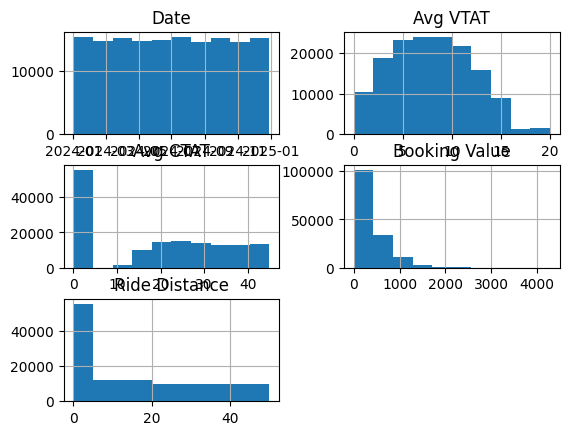

In [29]:
#data.hist()

<Axes: >

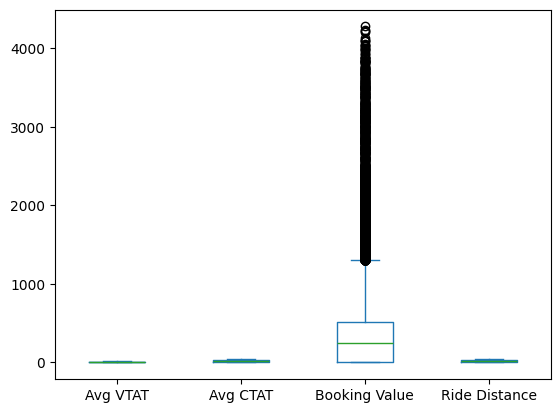

In [30]:
#data.plot(kind='box')

<Axes: >

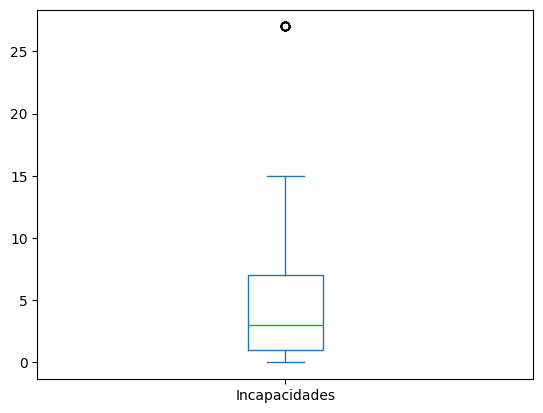

In [ ]:
#data['Incapacidades'].plot(kind='box') #No es un error

<Axes: xlabel='Casado'>

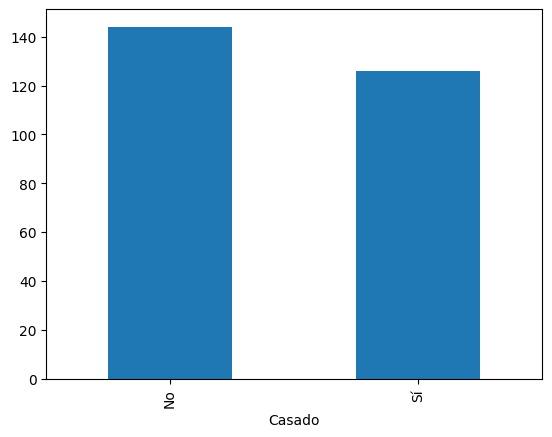

In [ ]:
data['Casado'].value_counts().plot(kind='bar')

In [31]:
#Instalar pandas profiling
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [32]:
#Cargar librería para Profiling
from ydata_profiling import ProfileReport
profile_data=ProfileReport(data, minimal= True)
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00, 11.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
data=data.copy()


In [ ]:
#Normalización de variables numéricas
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler ()
variables_a_normalizar=['Sueldo','Hijos', 'Incapacidades', 'Antiguedad']
min_max_scaler.fit(data[variables_a_normalizar]) #Ajuste de parámetro
data[variables_a_normalizar]=min_max_scaler.transform(data[variables_a_normalizar])
data[variables_a_normalizar].head()

,Sueldo,Hijos,Incapacidades,Antiguedad
0,0.291667,0.000000,0.259259,0.736842
1,0.500000,0.333333,0.111111,0.105263
2,0.444444,0.666667,0.185185,0.473684
3,0.708333,0.333333,0.555556,0.315789
4,0.305556,0.000000,0.037037,0.263158


In [ ]:
#Se crean dummies para las variables categóricas
data= pd.get_dummies(data, columns=['Casado','Carro','Casa','Sexo','Sindicato'], drop_first= True, dtype=int)
data.head()

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,0.291667,0.000000,0.259259,0.736842,1,0,0,0,0
1,0.500000,0.333333,0.111111,0.105263,0,1,0,1,1
2,0.444444,0.666667,0.185185,0.473684,1,1,1,0,1
3,0.708333,0.333333,0.555556,0.315789,1,1,0,1,0
4,0.305556,0.000000,0.037037,0.263158,1,1,1,0,1


2. Aprendizaje del Modelo
* Método codo/rodilla
* Aplicar kmeans

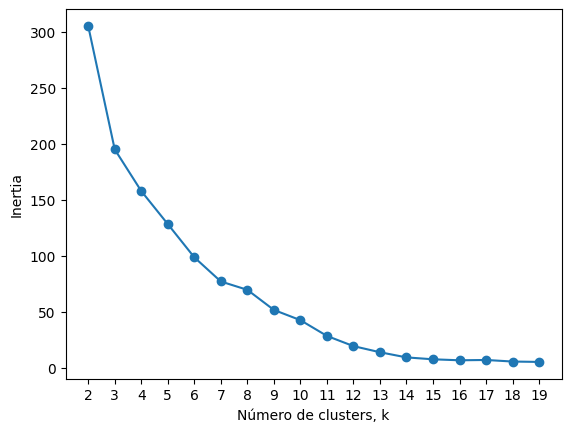

In [ ]:
#Metodo de la rodilla: silueta
from sklearn.cluster import KMeans
ks=range (2,20) #Crear valores del 2 al 20
inertias=[]
for k in ks:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)
#Graficar cantidad de cluster vs inertias
plt.plot(ks,inertias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

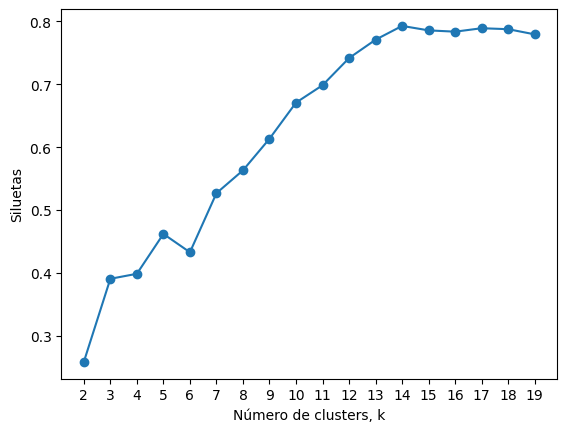

In [ ]:
#Metodo de la rodilla: silueta
from sklearn import metrics
ks=range (2,20) #Crear valores del 2 al 20
siluetas=[]
for k in ks:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data)
  sil=metrics.silhouette_score(data,kmeans.labels_)
  siluetas.append(sil)
#Graficar cantidad de cluster vs inertias
plt.plot(ks,siluetas, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Siluetas')
plt.xticks(ks)
plt.show()

In [ ]:
k=7
model=KMeans(n_clusters=k, max_iter=300)
model.fit(data) #100% datos

KMeans(n_clusters=7)

3. Evaluación del Modelo
* Inertia: Valor pequeño esperado
* Silueta: Valor positivo esperado, idealmente mayor a 0.5

In [ ]:
#Evaluación

from sklearn import metrics
print('Inertia o cohesión:', model.inertia_)
sil=metrics.silhouette_score(data,model.labels_)
print('Silueta:', sil)


Inertia o cohesión: 87.51446159102288
Silueta: 0.5259744376733655


4. Perfilamiento
Descripción de centroides

In [ ]:
#Centroides almacenados dentro del modelo
model.cluster_centers_

array([[ 5.50154321e-01,  3.33333333e-01,  5.55555556e-01,
         3.15789474e-01,  1.00000000e+00,  1.00000000e+00,
        -5.55111512e-17,  1.00000000e+00,  0.00000000e+00],
       [ 4.54089506e-01,  3.33333333e-01,  1.11111111e-01,
         3.68421053e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.66533454e-16,  1.00000000e+00],
       [ 5.48353909e-01,  1.11111111e-01,  9.87654321e-02,
         3.85964912e-01,  5.55111512e-16,  1.00000000e+00,
         3.33333333e-01,  1.00000000e+00,  1.00000000e+00],
       [ 4.67078189e-01,  7.77777778e-01,  1.35802469e-01,
         4.03508772e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  2.77555756e-16,  5.55111512e-16],
       [ 3.92746914e-01,  2.77555756e-17,  1.11111111e-01,
         5.26315789e-02,  0.00000000e+00,  1.00000000e+00,
        -5.55111512e-17, -5.55111512e-17,  0.00000000e+00],
       [ 5.28549383e-01,  3.60822483e-16,  4.44444444e-01,
         5.08771930e-01,  3.33333333e-01, -4.440892

In [ ]:
#Centroides de los cluster se conviertan en un dataframe de pandas
centroides=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)
centroides.round(1)

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,0.6,0.3,0.6,0.3,1.0,1.0,-0.0,1.0,0.0
1,0.5,0.3,0.1,0.4,1.0,1.0,1.0,-0.0,1.0
2,0.5,0.1,0.1,0.4,0.0,1.0,0.3,1.0,1.0
3,0.5,0.8,0.1,0.4,1.0,1.0,1.0,0.0,0.0
4,0.4,0.0,0.1,0.1,0.0,1.0,-0.0,-0.0,0.0
5,0.5,0.0,0.4,0.5,0.3,-0.0,0.0,0.7,0.0
6,0.5,0.0,-0.0,0.3,0.0,0.5,-0.0,-0.0,1.0


In [ ]:
#Se realiza una des-normalización centroides
centroides[variables_a_normalizar]=min_max_scaler.inverse_transform(centroides[variables_a_normalizar])
centroides.round(0)

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,5961111.0,1.0,15.0,7.0,1.0,1.0,-0.0,1.0,0.0
1,5269444.0,1.0,3.0,8.0,1.0,1.0,1.0,-0.0,1.0
2,5948148.0,0.0,3.0,8.0,0.0,1.0,0.0,1.0,1.0
3,5362963.0,2.0,4.0,9.0,1.0,1.0,1.0,0.0,0.0
4,4827778.0,0.0,3.0,2.0,0.0,1.0,-0.0,-0.0,0.0
5,5805556.0,0.0,12.0,11.0,0.0,-0.0,0.0,1.0,0.0
6,5700000.0,0.0,-0.0,8.0,0.0,0.0,-0.0,-0.0,1.0


Descripción de perfiles
* Perfil 0: Salario de 4.800.000, no hijo, incapacidades 7 días al año, 15 años de antigüedad, casado si, no vivienda, mujer y sindicato
* Perfil 1:
* Perfil 2:


In [ ]:
#En el dataframe original, se adiciona el cluster asignado a cada registro
data['cluster']=model.labels_
data.head()

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí,cluster
0,0.291667,0.000000,0.259259,0.736842,1,0,0,0,0,5
1,0.500000,0.333333,0.111111,0.105263,0,1,0,1,1,2
2,0.444444,0.666667,0.185185,0.473684,1,1,1,0,1,1
3,0.708333,0.333333,0.555556,0.315789,1,1,0,1,0,0
4,0.305556,0.000000,0.037037,0.263158,1,1,1,0,1,1


<Axes: ylabel='count'>

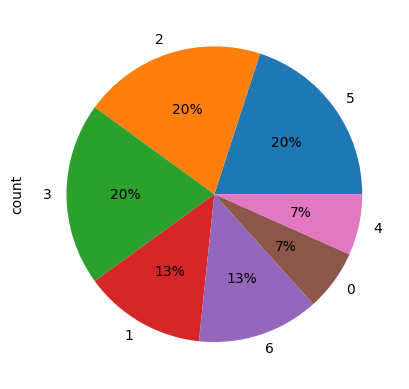

In [ ]:
#Cantidad de datos en cada clúster
data['cluster'].value_counts().plot(kind='pie',autopct='%.0f%%')

In [ ]:
#Almacenar resultados
data.to_excel('./resultados_KMeans.xlsx')
centroides.to_excel('./centroides_KMeans.xlsx')